## The U.S. Real GDP growth and the Yield Curve since 2000

The slope of the Yield Curve (the gap between the yields on short and long-term maturity bonds) has achieved some notoriety as a simple forecaster of economic growth. The rule of thumb is that an inverted yield curve (short rates above long rates) indicates a recession in about a year, and yield curve inversions have preceded each of the last seven recessions. One of the recessions predicted by the yield curve was the most recent one: the yield curve inverted in August 2006, a bit more than a year before the most recent recession started in December 2007. There have been two notable false positives: an inversion in late 1966 and a very flat curve in late 1998.

More generally, a flat curve indicates weak growth and, conversely, a steep curve indicates strong growth. One measure of slope, the spread between 10-year Treasury bonds and 3-month Treasury bills, bears out this relation, particularly when real GDP growth is lagged a year to line up growth with the spread that predicts it.

In this code we will focus on: 

- The U.S. real GDP growth (quarterly) YoY since 2000 
- The spread between Treasury notes (10Y) and Treasury bills (3M here)
- The correlation between the spread and the real GDP growth of the following 18 months

In [1]:
### Modules installation ###

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
### We read our dataframe avaible on FRED St Louis website ### 

US_GDP_Growth = pd.read_csv("GDP_QYoY_2000.csv") # The U.S. real GDP growth (quarterly YoY) since 2000
Yield_Curve = pd.read_csv("T10Y3M_Q_2000.csv") # The Yield Curve since 2000

In [3]:
### We make sure that our dataframe have the same shape ###

if Yield_Curve.shape == US_GDP_Growth.shape: 
    print("Next step")
else:
    print("Beware of your shape")

Next step


In [4]:
### We merge our dataframes ###

US_economy = pd.merge(left=US_GDP_Growth, right=Yield_Curve, on="DATE")

### We make sure of our manipulation ###

print(US_economy.head())
print(US_economy.tail())
print(US_economy.describe())

         DATE  GDPC1_PC1    T10Y3M
0  2000-01-01    4.22596  0.763810
1  2000-04-01    5.24468  0.288889
2  2000-07-01    3.97408 -0.312222
3  2000-10-01    2.90162 -0.629516
4  2001-01-01    2.19554  0.110806
          DATE  GDPC1_PC1    T10Y3M
83  2020-10-01   -2.26292  0.771613
84  2021-01-01    0.54698  1.284754
85  2021-04-01   12.22668  1.565625
86  2021-07-01    4.94656  1.275156
87  2021-10-01    5.53174  1.479194
       GDPC1_PC1     T10Y3M
count  88.000000  88.000000
mean    2.006910   1.689446
std     2.381153   1.136571
min    -9.083740  -0.629516
25%     1.503718   0.774153
50%     2.171775   1.713279
75%     2.990830   2.631983
max    12.226680   3.608033


C:\Users\Raffin\AppData\Local\Temp/ipykernel_8288/123305319.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(label_x)
C:\Users\Raffin\AppData\Local\Temp/ipykernel_8288/123305319.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(label_x)


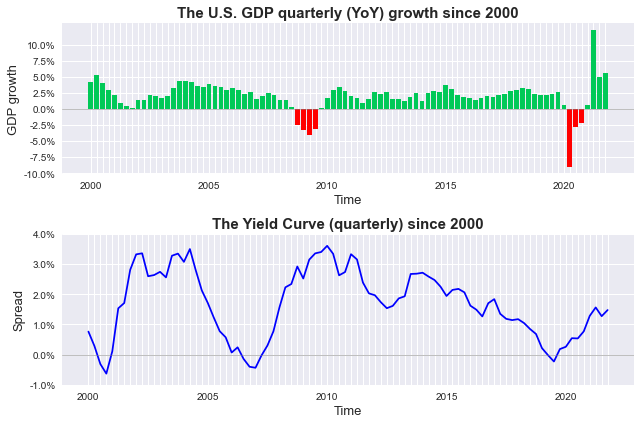

In [5]:
### GRAPH ###

### We create our graph panes ###

mpl.style.use("seaborn") # We are using the seaborn style 

fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

label_x = ["2000", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "2005", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
            "2010", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
            "2015", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
            "2020", "", "", "", "", "", "", ""]
label_y = ["-10.0%", "-7.5%", "-5.0%", "-2.5%", "0.0%", "2.5%", "5.0%", "7.5%", "10.0%"]

### The U.S. GDP quarterly (YoY) growth since 2000 ###

colors = []
for i in range(US_economy.shape[0]):
    if US_economy["GDPC1_PC1"].iloc[i] >= 0:
        colors.append("#00C957")
    else:
        colors.append("red")
        
ax1.bar(US_economy["DATE"], US_economy["GDPC1_PC1"], color = colors)
ax1.set_xticklabels(label_x)
ax1.set_yticklabels([])
ax1.grid(visible = False)
ax1.set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
ax1.set_yticklabels(label_y)
ax1.grid(visible = True)
ax1.axhline(xmin = 0, color = "grey", alpha = 0.5, linewidth = 1)
ax1.set_xlabel("Time", size = 13)
ax1.set_ylabel("GDP growth", size = 13)
ax1.set_title("The U.S. GDP quarterly (YoY) growth since 2000", size = 15, fontweight = "bold")

### The Yield Curve (T10Y3M) (quarterly) since 2000 ###

ax2.plot(US_economy["DATE"], US_economy["T10Y3M"], color = "blue")
ax2.set_xticklabels(label_x)
ax2.set_yticklabels([])
ax2.grid(visible = False)
ax2.set_yticks([-1, 0, 1, 2, 3, 4])
ax2.set_yticklabels(["-1.0%", "0.0%", "1.0%", "2.0%","3.0%", "4.0%"])
ax2.grid(visible = True)
ax2.axhline(xmin = 0, color = "grey", alpha = 0.5, linewidth = 1)
ax2.set_xlabel("Time", size = 13)
ax2.set_ylabel("Spread", size = 13)
ax2.set_title("The Yield Curve (quarterly) since 2000", size = 15, fontweight = "bold")

### Plotting part ### 

fig.tight_layout() # We are making some room 
plt.show()

In [6]:
# We notice what we already knew: the Yield Curve trend is a good predictor of the GDP growth
# Let's plot these two trend on the same graph

# We will first delete the rows of our dataframe after 2020 because the Covid-19 creates a bias

US_economy = US_economy.iloc[:-7]
print(US_economy.tail()) # We make sure that our manipulation is right 

          DATE  GDPC1_PC1    T10Y3M
76  2019-01-01    2.15300  0.214426
77  2019-04-01    2.11148 -0.015873
78  2019-07-01    2.31833 -0.228125
79  2019-10-01    2.56942  0.184355
80  2020-01-01    0.63079  0.260968


C:\Users\Raffin\AppData\Local\Temp/ipykernel_8288/1750012575.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label_x)


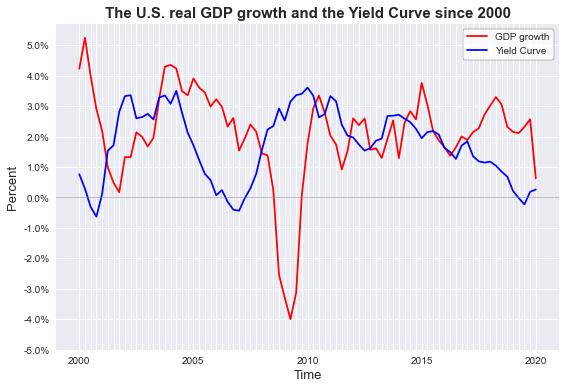

In [7]:
### Relation between the U.S. GDP growth and the Yield Curve since 2000 ###

label_xbis = ["2000", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "2005", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
            "2010", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
            "2015", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
            "2020"]

fig, ax = plt.subplots(figsize = (9,6))
ax.plot(US_economy["DATE"], US_economy["GDPC1_PC1"], color = "red", label = "GDP growth")
ax.plot(US_economy["DATE"], US_economy["T10Y3M"], color = "blue", label = "Yield Curve")

ax.set_xticklabels(label_x)
ax.set_yticklabels([])
ax.grid(visible = False)
ax.set_yticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_yticklabels(["-5.0%", "-4.0%", "-3.0%", "-2.0%", "-1.0%", "0.0%", "1.0%", "2.0%","3.0%", "4.0%", "5.0%"])
ax.grid(visible = True)
ax.set_xlabel("Time", size = 13)
ax.set_ylabel("Percent", size = 13)

ax.axhline(xmin = 0, color = "grey", alpha = 0.5, linewidth = 1)
ax.set_title("The U.S. real GDP growth and the Yield Curve since 2000", size = 15, fontweight = "bold")
ax.legend(frameon = True, facecolor = "white", edgecolor = "black")

plt.show()

In [8]:
# We said earlier that the Yield Curve could be a forecaster of the GDP growth within a year
# Let's plot the relation between the spread and the GDP growth one year later 

# We modify our dataframe to match the spread with the GDP of the following year

spread_adj = [0, 0, 0, 0, 0, 0]
for i in range(US_economy.shape[0]-6):
    spread_adj.append(US_economy["T10Y3M"].iloc[i])

gdp_adj = []
for i in range(US_economy.shape[0]):
    gdp_adj.append(US_economy["GDPC1_PC1"].iloc[i])

# We create our new dataframe with the spread and the GDP growth within 18 months here

d = {"SPR": spread_adj, "GDP": gdp_adj}
df = pd.DataFrame(data = d)
df = df.iloc[6:]

print(df.head(10)) # We check that our new dataframe is right
print(df.tail(10))

         SPR      GDP
6   0.763810  0.48735
7   0.288889  0.17064
8  -0.312222  1.32881
9  -0.629516  1.32288
10  0.110806  2.14067
11  1.535556  1.99129
12  1.712131  1.67619
13  2.812419  1.95699
14  3.324833  3.23991
15  3.359844  4.29508
         SPR      GDP
71  1.490781  2.71789
72  1.266094  3.01531
73  1.705410  3.29615
74  1.840484  3.05289
75  1.352857  2.32062
76  1.187460  2.15300
77  1.144839  2.11148
78  1.176393  2.31833
79  1.045937  2.56942
80  0.849206  0.63079


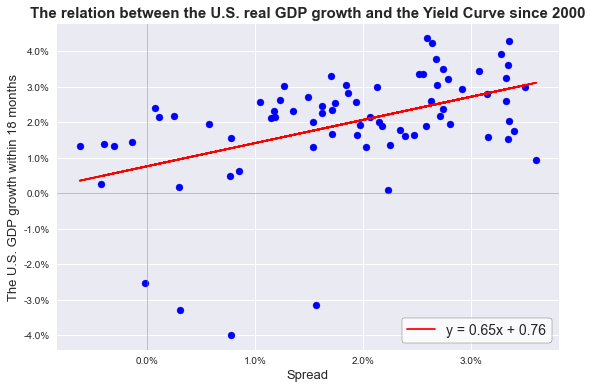

In [9]:
### Relation between the spread and the GDP growth ###

fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(df["SPR"], df["GDP"], color = "blue")
ax.set_xticks([-1, 0, 1, 2, 3, 4])
ax.set_xticklabels(["-1.0%", "0.0%", "1.0%", "2.0%", "3.0%", "4.0"])
ax.set_yticklabels([])
ax.grid(visible = False)
ax.set_yticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_yticklabels(["-5.0%", "-4.0%", "-3.0%", "-2.0%", "-1.0%", "0.0%", "1.0%", "2.0%","3.0%", "4.0%", "5.0%"])
ax.grid(visible = True)
ax.axhline(xmin = 0, color = "grey", alpha = 0.5, linewidth = 1)
ax.axvline(ymin = 0, color = "grey", alpha = 0.5, linewidth = 1)
ax.set_xlabel("Spread", size = 13)
ax.set_ylabel("The U.S. GDP growth within 18 months", size = 13)
ax.set_title("The relation between the U.S. real GDP growth and the Yield Curve since 2000", size = 15, fontweight = "bold")

### Linear regression ###

X = df["SPR"]
Y = df["GDP"]

from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

def predict(x):
   return slope * x + intercept # We create a function that enables us to make prediction 

ax.plot(X, predict(X), color = "red", label = f"y = {round(slope, 2)}x + {round(intercept,2)}") # We plot our line 
ax.legend(frameon = True, facecolor = "white", edgecolor = "black", fontsize = 14)
plt.show()

In [10]:
# Let's check that our previous calculations are right

from statistics import stdev
beta = str(round(df["SPR"].corr(df["GDP"]) * stdev(df["GDP"]) / stdev(df["SPR"]), 2))
print("Our beta is: " + beta)

Our beta is: 0.65
